# Data608 Final Project
### By Ritesh Lohiya

### CRIMES IN THE CITY OF CHICAGO

### Introduction:

I am going to present the crimes committed in the City of Chicago from 2012 to 2017.

My dashboard will show an overview of crimes committed in the City of Chicago from 2012 to 2017, including trends of crime over years, type of crimes committed most, geographic distribution of crimes committed categorized by types. In general, it will give a objective visual representation of crimes took place in past few years from different perspectives. 

### Data Source: 

I have identified the data from Kaggle. 

https://www.kaggle.com/vic666/chicago-crimes-2012-to-2017

### Data Attributes:

ID                             
Case Number                         
Date                       
Block                   
IUCR                      
Primary Type                 
Description                
Location Description                  
Arrest                     
Domestic                
Beat                
District                  
Ward                     
Community Area                       
FBI Code                     
X Coordinate                
Y Coordinate                    
Year                         
Updated On                 
Latitude               
Longitude                  
Location

In [1]:
#Lets start loading the packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from datetime import datetime,timedelta
import seaborn as sns
sns.set(style="ticks")
from numpy import zeros, sqrt, where, pi, mean, arange, histogram
import bisect
import sys
import urllib.request
#from scipy.misc import imread
import numpy as np
import xml.etree.ElementTree as ET


In [2]:
#Importing the dataset
df = pd.read_csv("C:/Users/rites/Documents/GitHub/Data608_Module6/Chicago_Crimes_2012_to_2017.csv")

In [3]:
df.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [4]:
df.columns

Index(['Arrest', 'Beat', 'Block', 'Dates', 'isUnderArrest', 'isDomestic',
       'Case Number', 'Community Area', 'Date', 'Description', 'District',
       'Domestic', 'F1', 'FBI Code', 'ID', 'IUCR', 'Latitude',
       'Location Description', 'Location', 'Longitude', 'Number of Records',
       'Primary Type', 'Updated On', 'Ward', 'X Coordinate', 'Y Coordinate',
       'Year'],
      dtype='object')

In [5]:
#Fisrt lets drop Case Number, F1, isUnderArrest, IUCR, Number of Records, Updated On
df.drop(['Case Number','F1','isUnderArrest', 'isDomestic', 'IUCR', 'Number of Records',
             'Updated On'],1, inplace=True)

In [6]:
df.shape

(1456714, 20)

In [7]:
# convert dates to pandas format
df.Date_new = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date_new)
day=[datetime.strptime(i,"%m/%d/%Y %I:%M:%S %p") for i in df.Date.values]

C:\Users\rites\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [8]:
# convert the below columns into Categorical
df['Primary Type']         = pd.Categorical(df['Primary Type'])
df['Location Description'] = pd.Categorical(df['Location Description'])
df['Description']          = pd.Categorical(df['Description'])

In [9]:
df

,Arrest,Beat,Block,Dates,Community Area,Date,Description,District,Domestic,FBI Code,ID,Latitude,Location Description,Location,Longitude,Primary Type,Ward,X Coordinate,Y Coordinate,Year
Date,,,,,,,,,,,,,,,,,,,,
2012-03-14 00:20:00,False,1622,060XX W HIGGINS AVE,NaN,11.0,3/14/2012 12:20:00 AM,AGGRAVATED: HANDGUN,16.0,False,04A,8519497,41.973262,PARKING LOT/GARAGE(NON.RESID.),"(41.973261823, -87.778537299)",-87.778537,ASSAULT,45.0,1135114.0,1933335.0,2012
2012-03-13 23:20:00,False,912,036XX S ARCHER AVE,NaN,59.0,3/13/2012 11:20:00 PM,TO VEHICLE,9.0,False,14,8519499,41.828089,ALLEY,"(41.828088837, -87.681394034)",-87.681394,CRIMINAL DAMAGE,11.0,1161932.0,1880620.0,2012
2012-03-14 01:45:00,True,1822,009XX W WEED ST,NaN,8.0,3/14/2012 1:45:00 AM,SIMPLE,18.0,False,08B,8519500,41.909799,BAR OR TAVERN,"(41.909798633, -87.652036281)",-87.652036,BATTERY,32.0,1169697.0,1910457.0,2012
2012-03-07 19:00:00,False,1925,006XX W STRATFORD PL,NaN,6.0,3/7/2012 7:00:00 PM,$500 AND UNDER,19.0,False,06,8519501,41.945143,RESIDENCE PORCH/HALLWAY,"(41.945142544, -87.64485617)",-87.644856,THEFT,44.0,1171548.0,1923352.0,2012
2012-03-13 00:10:00,False,2221,094XX S LAFLIN ST,NaN,73.0,3/13/2012 12:10:00 AM,ARMED: HANDGUN,22.0,False,03,8519502,41.722221,SIDEWALK,"(41.722221101, -87.660270647)",-87.660271,ROBBERY,21.0,1167991.0,1842087.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-01 05:50:00,True,124,005XX W ROOSEVELT RD,NaN,28.0,5/1/2016 5:50:00 AM,RETAIL THEFT,1.0,False,06,10505414,41.867252,CONVENIENCE STORE,"(41.867251542, -87.639594427)",-87.639594,THEFT,2.0,1173209.0,1894980.0,2016
2016-05-01 02:00:00,False,834,042XX W 82ND ST,NaN,70.0,5/1/2016 2:00:00 AM,$500 AND UNDER,8.0,False,06,10505416,41.743472,STREET,"(41.743471527, -87.727552433)",-87.727552,THEFT,13.0,1149569.0,1849694.0,2016
2016-05-01 05:45:00,False,132,017XX S INDIANA AVE,NaN,33.0,5/1/2016 5:45:00 AM,OVER $500,1.0,False,06,10505418,41.858622,STREET,"(41.858622417, -87.622346566)",-87.622347,THEFT,2.0,1177933.0,1891874.0,2016


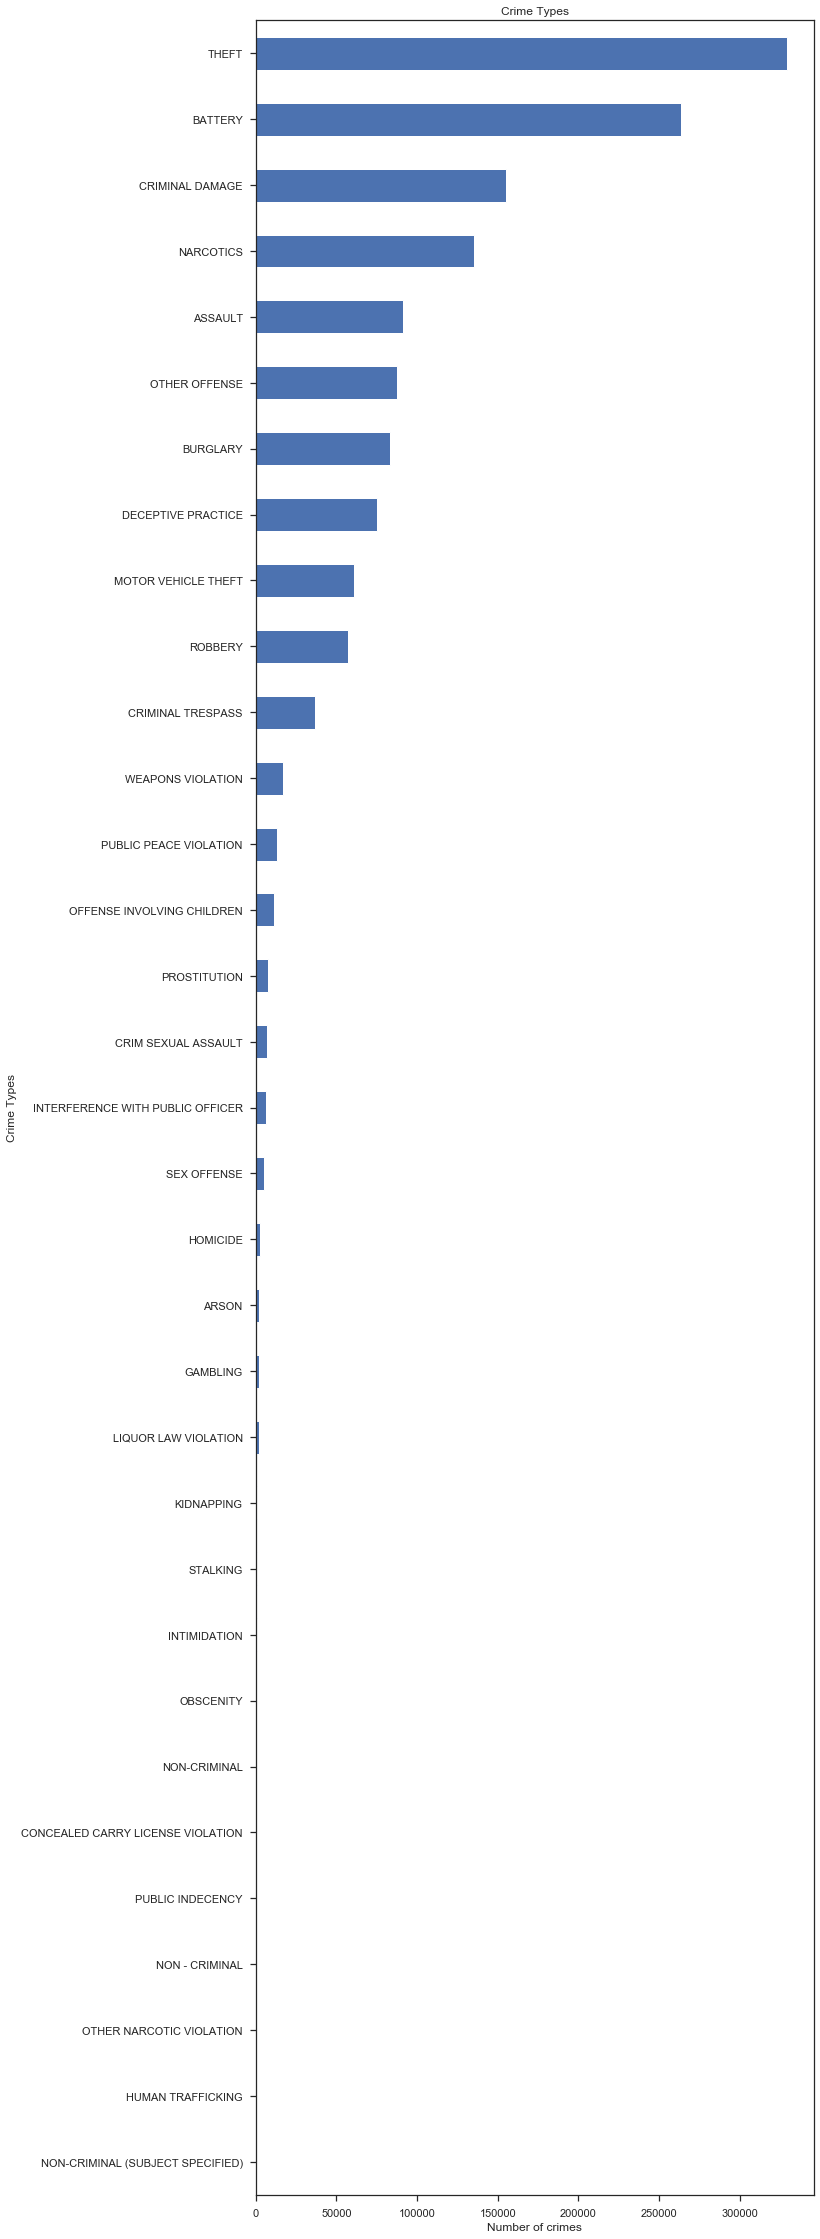

In [10]:
# lets visualize the data
#Lets see the types of crime
plt.figure(figsize=(10,40))
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Crime Types')
plt.ylabel('Crime Types')
plt.xlabel('Number of crimes')
plt.show()

#General THEFT seems to be most common

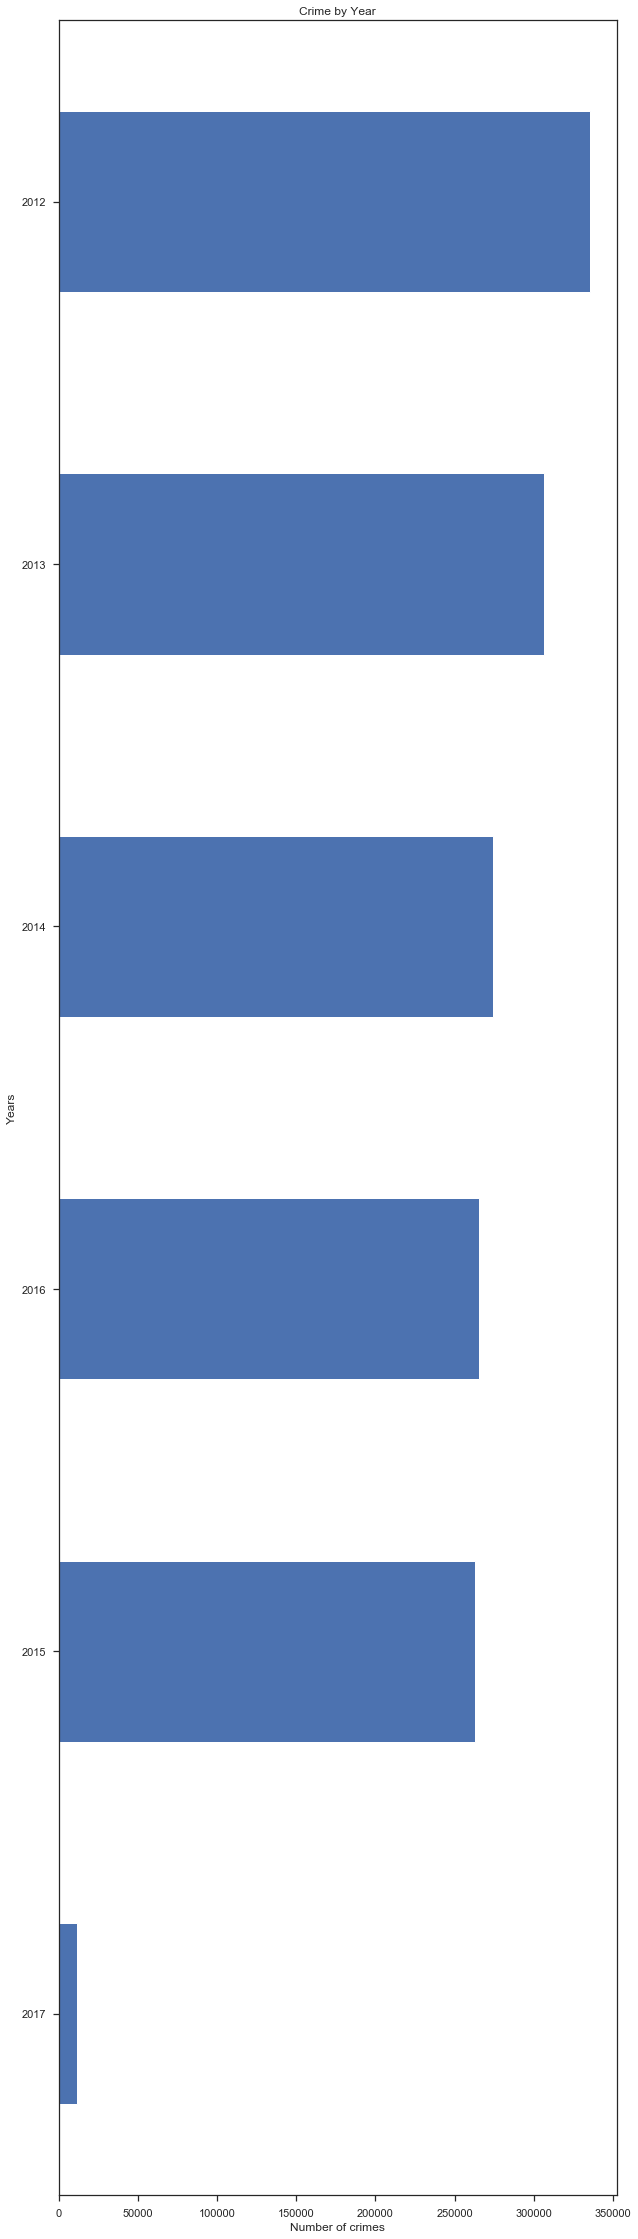

In [11]:
#Lets see the crimes by year
plt.figure(figsize=(10,40))
df.groupby([df['Year']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Crime by Year')
plt.ylabel('Years')
plt.xlabel('Number of crimes')
plt.show()

#Year 2017 seems to be the least!!!!

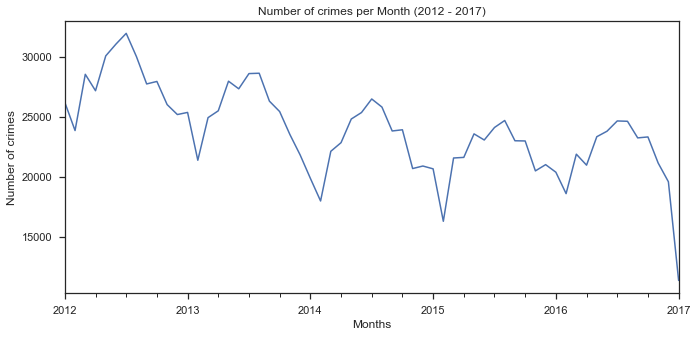

In [12]:
#How many crimes for each Month
plt.figure(figsize=(11,5))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per Month (2012 - 2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()


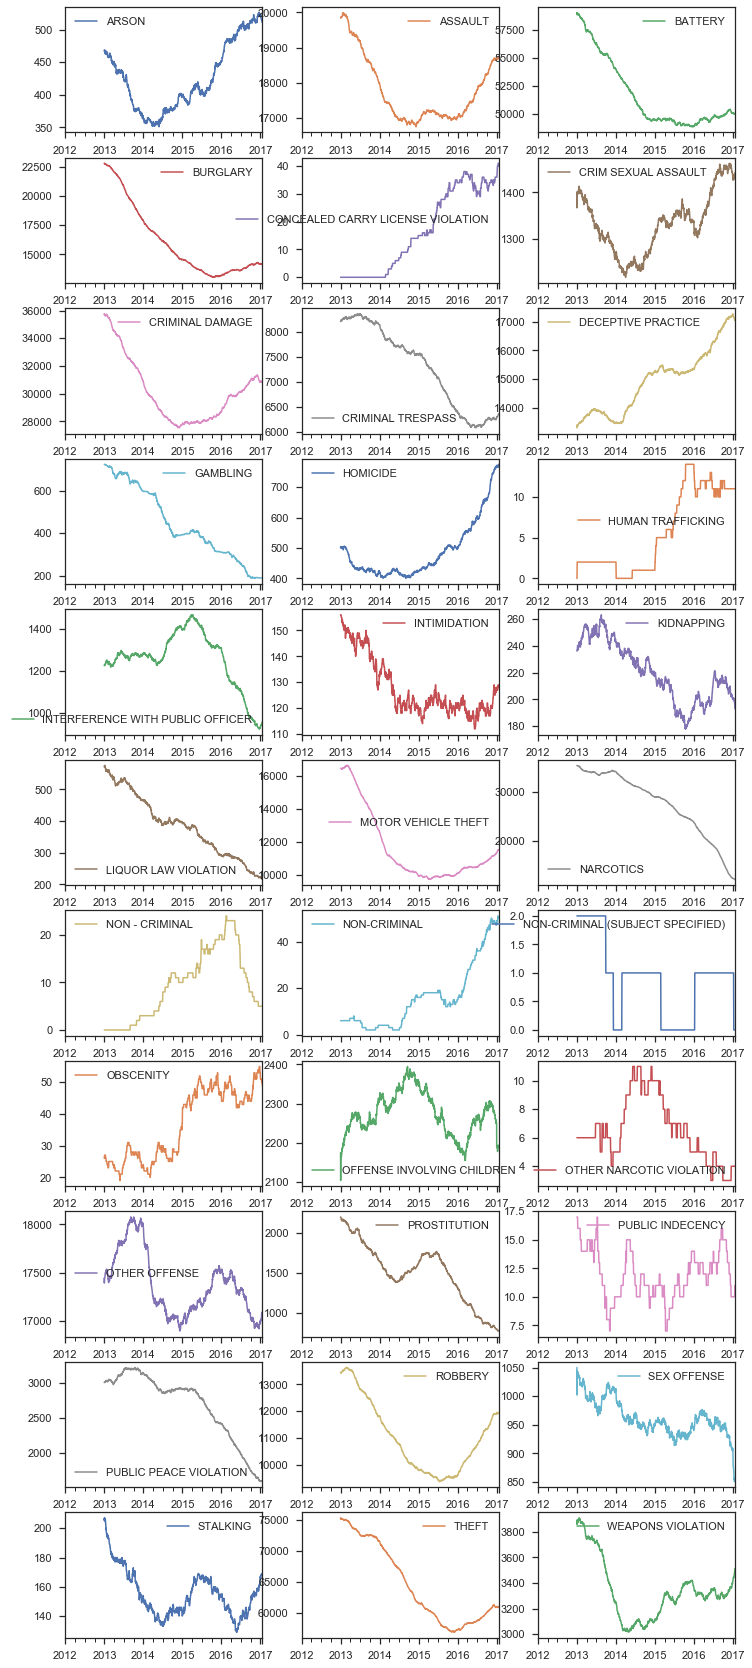

In [13]:
#Let's separate crimes by type and see

t1 = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df.index.date, fill_value=0)
t1.index = pd.DatetimeIndex(t1.index)
pl1 = t1.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)


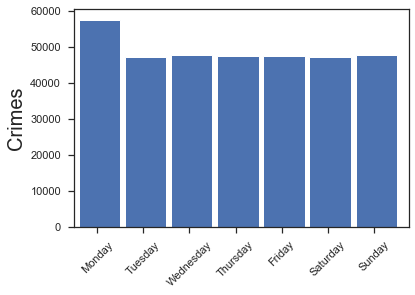

In [14]:
#What days of the week are really dangerous:
days=[i.day for i in day]
day_labels=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.bar(np.arange(0.55,6.9,1.0),[days.count(i+1) for i in range(7)],width=0.9)
plt.xlim(0,7.25)
plt.xticks(np.arange(.5,7.5,1),day_labels,rotation=45)
plt.ylabel("Crimes",fontsize=20)
plt.show()


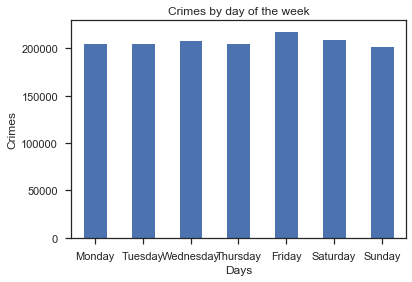

In [15]:
#What days of the week are really dangerous:
df.groupby([df.index.dayofweek]).size().plot(kind='bar')
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(np.arange(7), days,rotation ='horizontal')
plt.xlabel('Days')
plt.ylabel('Crimes')
plt.title('Crimes by day of the week')
plt.show()

#Very evenly distributed

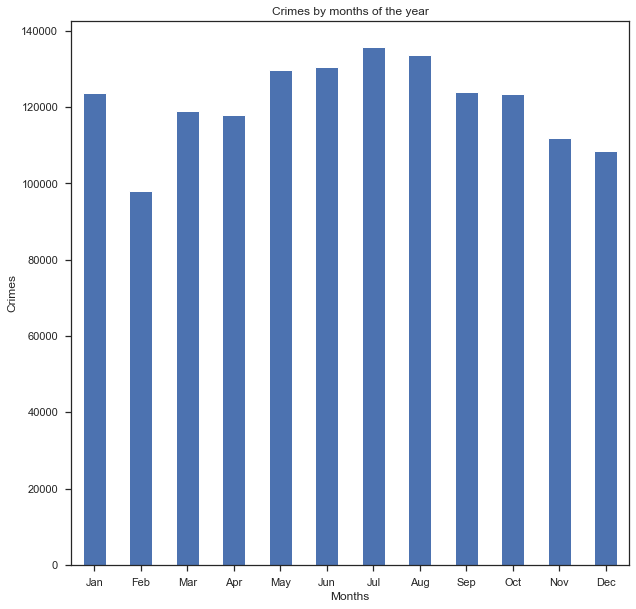

In [16]:
#What months of the year are really dangerous:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(10,10))
df.groupby([df.index.month]).size().plot(kind='bar')
plt.xticks(np.arange(12),months,rotation = 'horizontal')
plt.xlabel('Months')
plt.ylabel('Crimes')
plt.title('Crimes by months of the year')
plt.show()

#Except for February it looks like its same throughout the year.

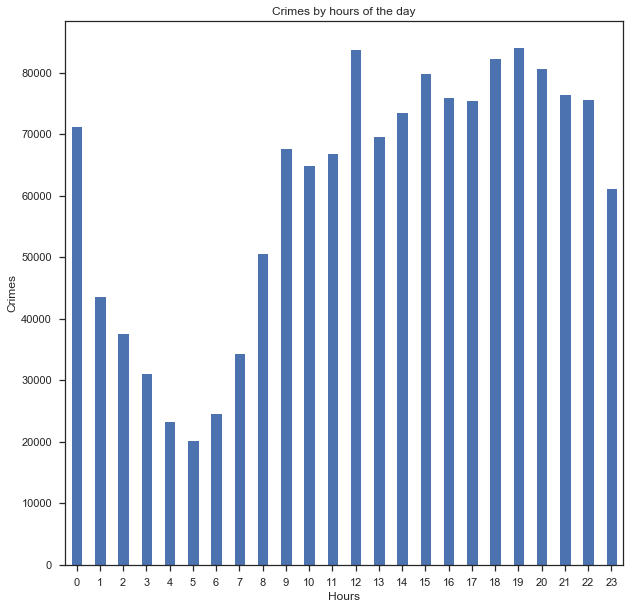

In [17]:
#What time of the day are really dangerous:
plt.figure(figsize=(10,10))
df.groupby([df.index.hour]).size().plot(kind='bar')
plt.xticks(np.arange(24),rotation = 'horizontal')
plt.xlabel('Hours')
plt.ylabel('Crimes')
plt.title('Crimes by hours of the day')
plt.show()

#PM times are dangerous!!!!

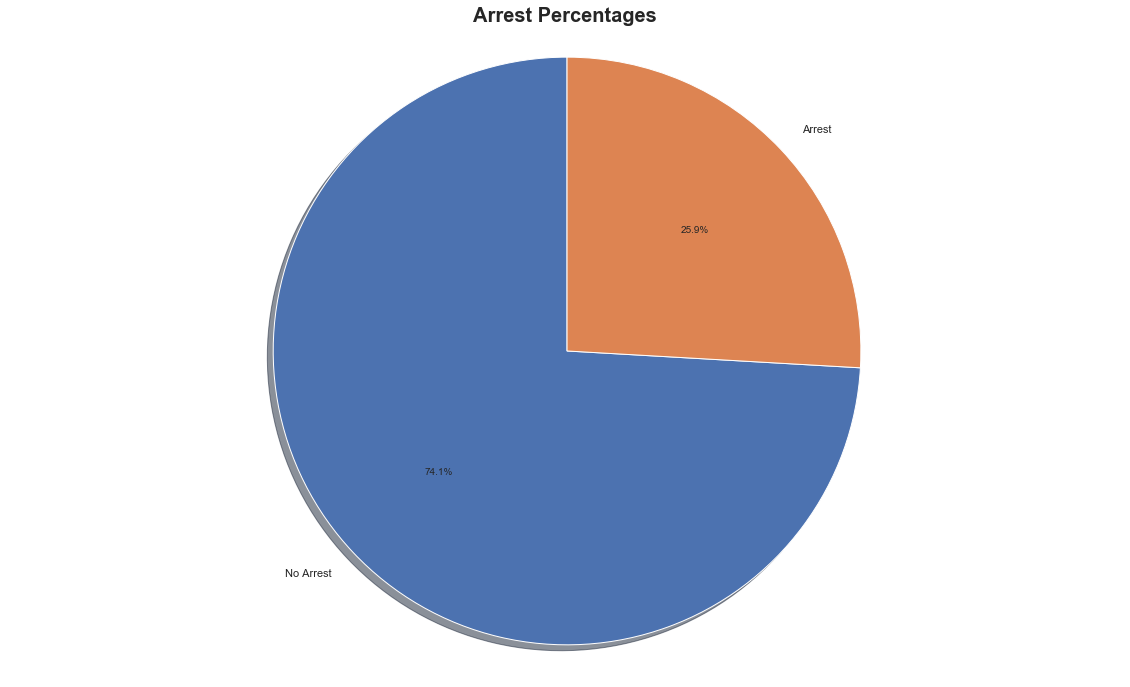

In [18]:
#Percentage that had arrests to no arrests
fig1, ax1 = plt.subplots()
fig1.set_size_inches(20, 12)
ax1.pie(df["Arrest"].value_counts().sort_index(), labels=["No Arrest", "Arrest"], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.set_title('Arrest Percentages', fontsize=20, fontweight='bold')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#Here we can see that nearly 74% of the time a crime is committed no arrest is made and only 26% of the time an arrest is made.

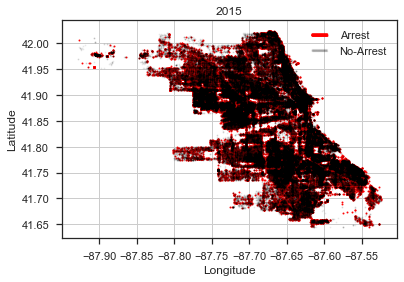

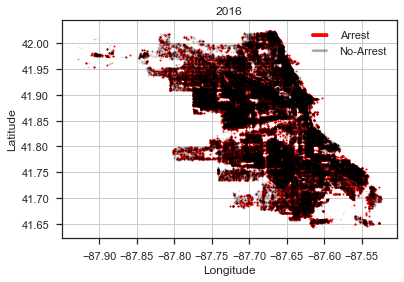

In [19]:
#Lets see arrest vs no-arrest for 2015 and 2016

for year in range(2015,2017):
    data_year = df[df.Year == year]
    arrests = data_year[data_year.Arrest == True]
    non_arrests = data_year[data_year.Arrest == False]
    arrest = plt.scatter(arrests.Longitude, arrests.Latitude, c="red", s=1, alpha=.9)
    no_arrest = plt.scatter(non_arrests.Longitude, non_arrests.Latitude, c="black", s=1, alpha=.05)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(year)
    plt.grid(True)
    plt.legend((arrest,no_arrest),("Arrest", "No-Arrest"), scatterpoints=75)
    plt.show()

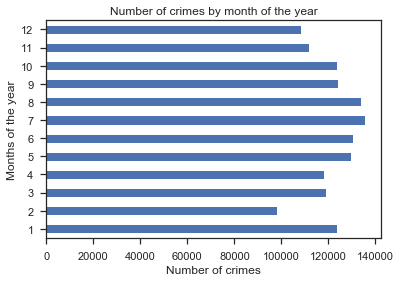

In [20]:
#lets see crimes by months
df.groupby([df.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

#Not much difference, crimes happen equally throughout the year

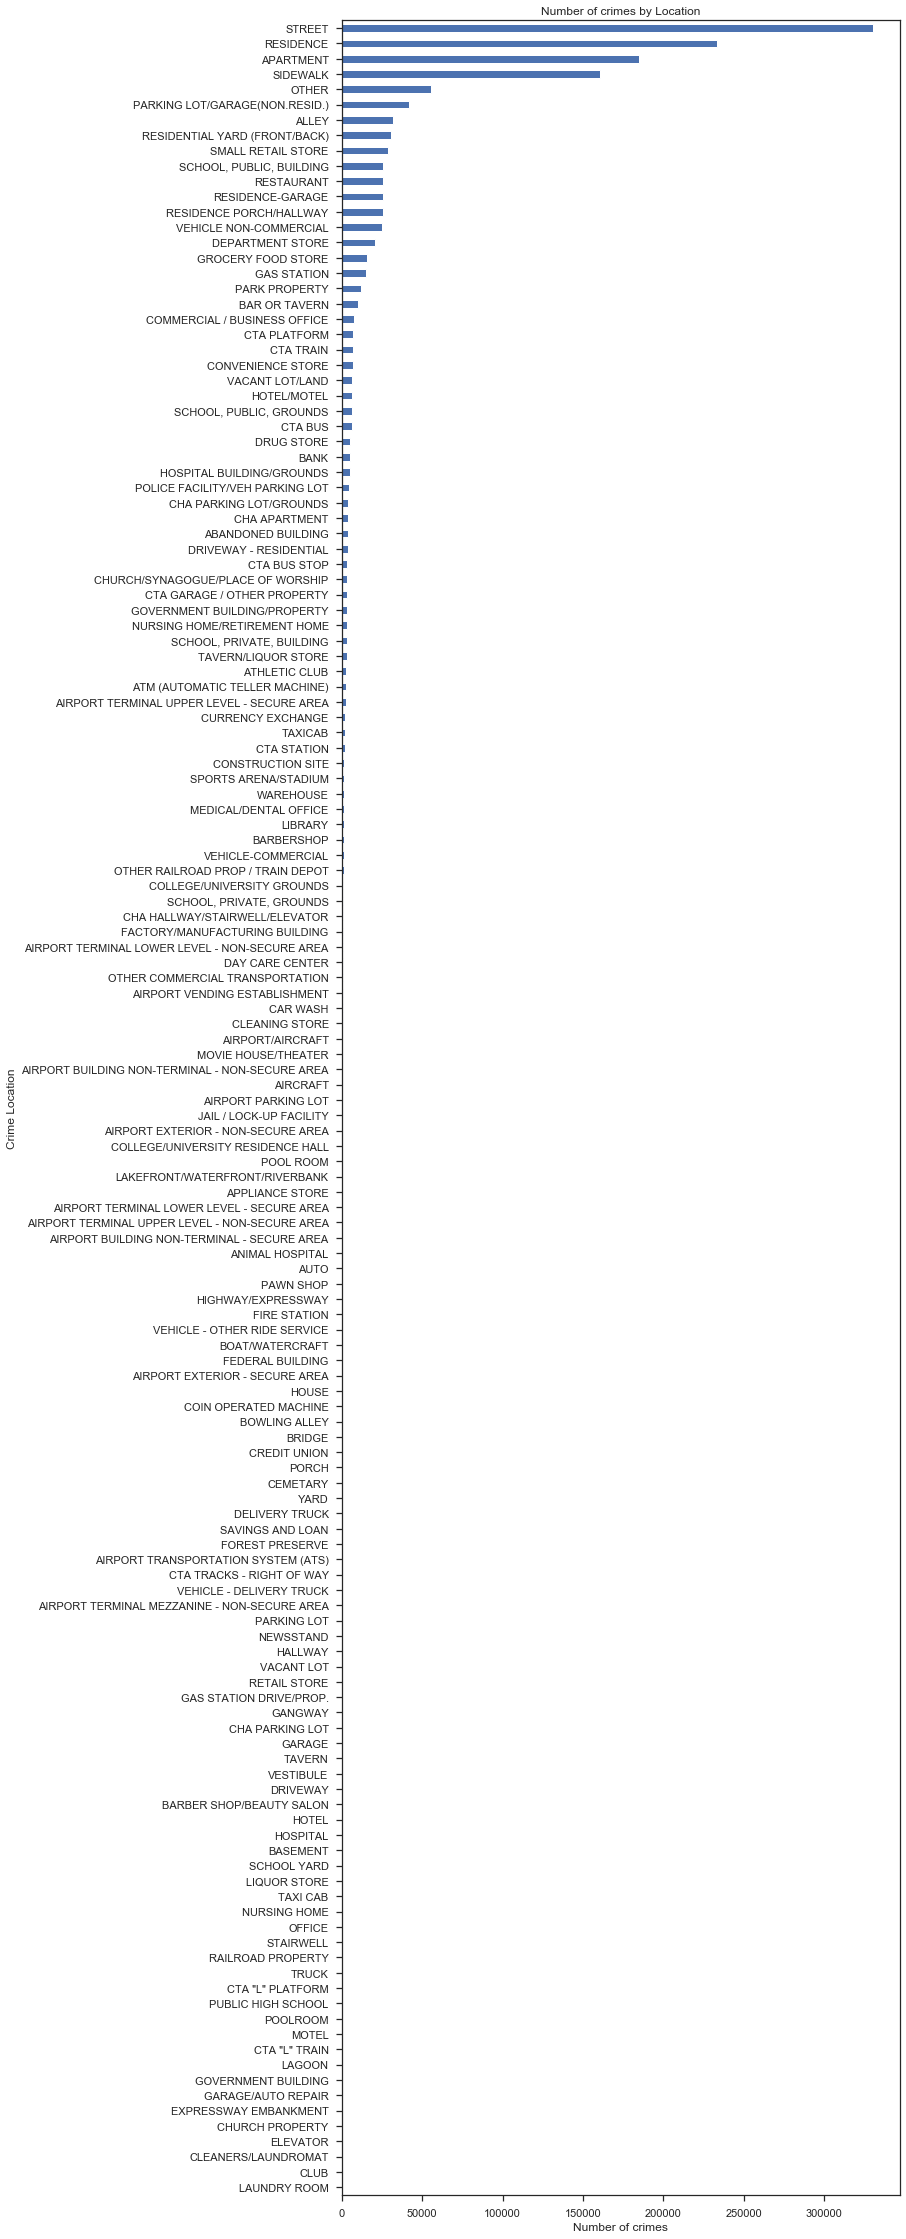

In [21]:
#Lets see the location
plt.figure(figsize=(10,40))
df.groupby([df['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

#Most of the crimes happens on Street

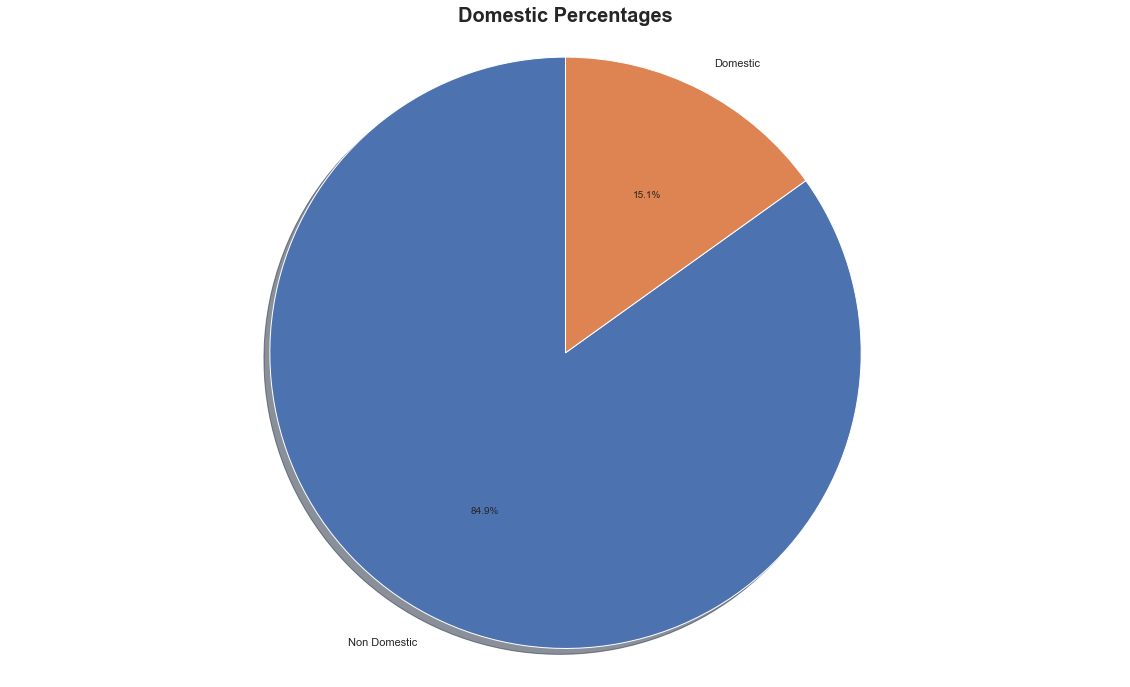

In [22]:
#Percentage of domestic and non domestic
fig1, ax1 = plt.subplots()
fig1.set_size_inches(20, 12)
ax1.pie(df["Domestic"].value_counts().sort_index(), labels=["Non Domestic", "Domestic"], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.set_title('Domestic Percentages', fontsize=20, fontweight='bold')
ax1.axis('equal')  

plt.show()

#Here we can see that nearly 85% of the time a crime committed are non domestic and 15% of the crimes are domestic.

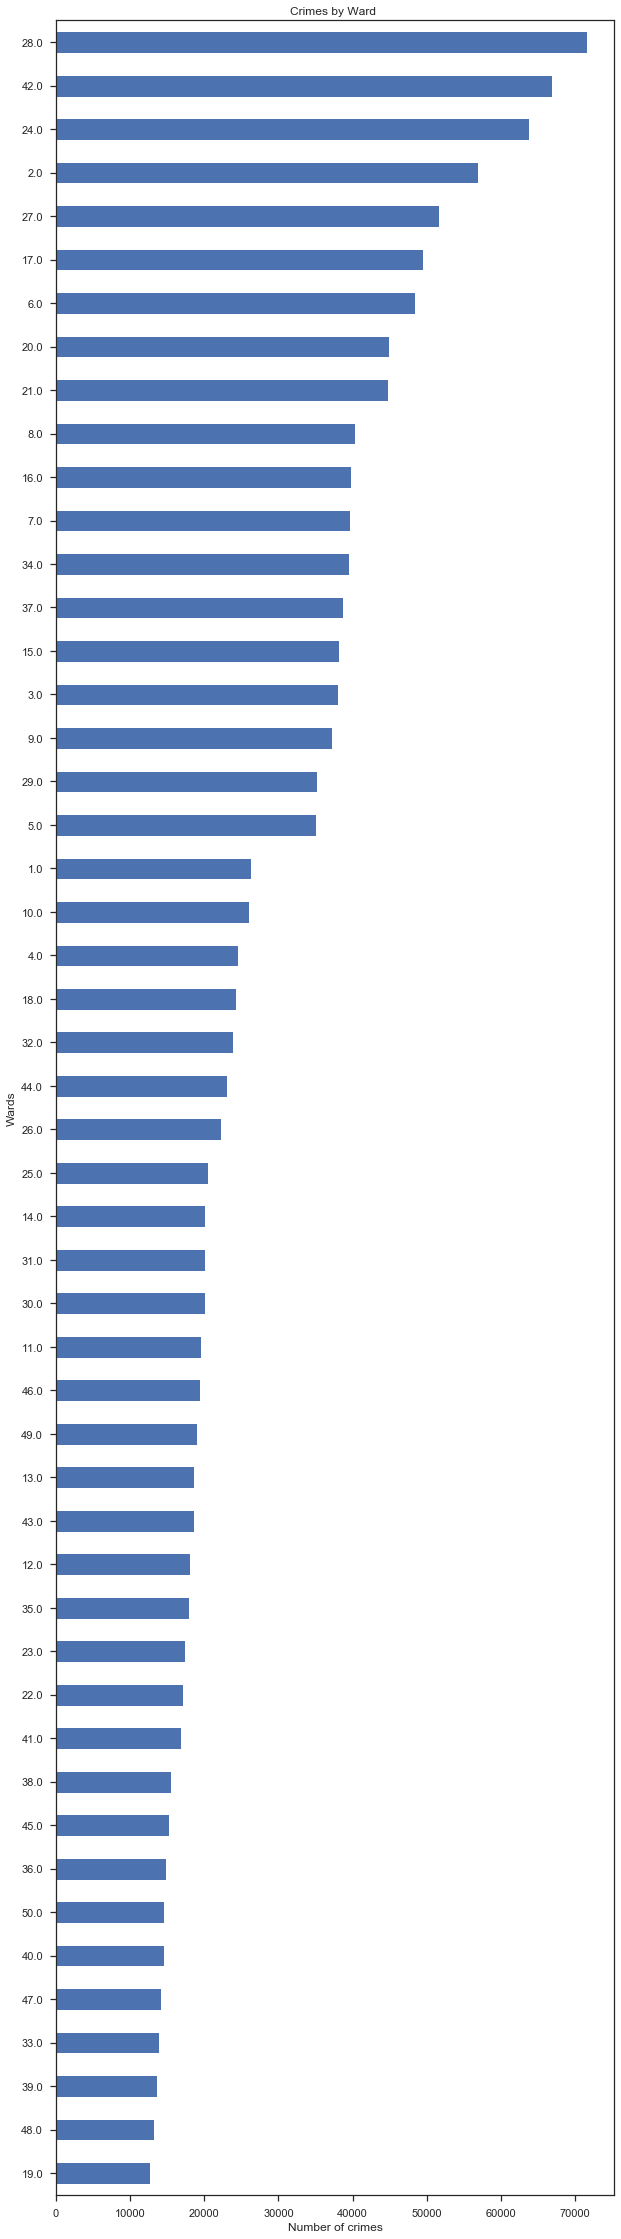

In [23]:
#Lets see the wards
plt.figure(figsize=(10,40))
df.groupby([df['Ward']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Crimes by Ward ')
plt.ylabel('Wards')
plt.xlabel('Number of crimes')
plt.show()

#Ward 28 is most dangerours and ward 19 is most safe

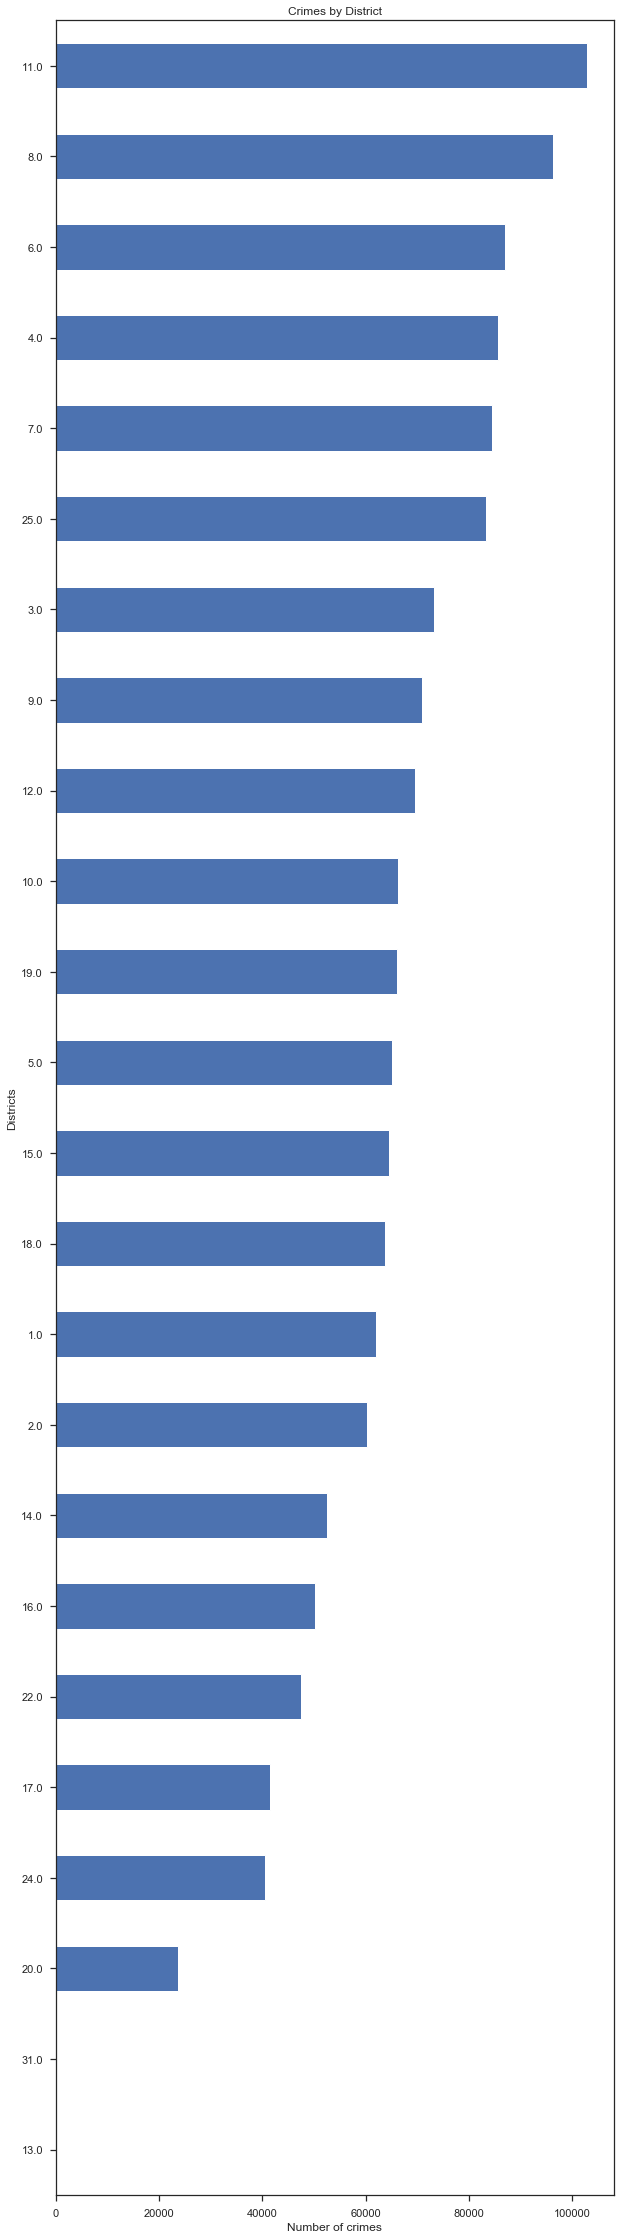

In [24]:
#Lets see the Districts
plt.figure(figsize=(10,40))
df.groupby([df['District']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Crimes by District')
plt.ylabel('Districts')
plt.xlabel('Number of crimes')
plt.show()

#District 11 is most dangerours and Districts 11 and 31 are most safe

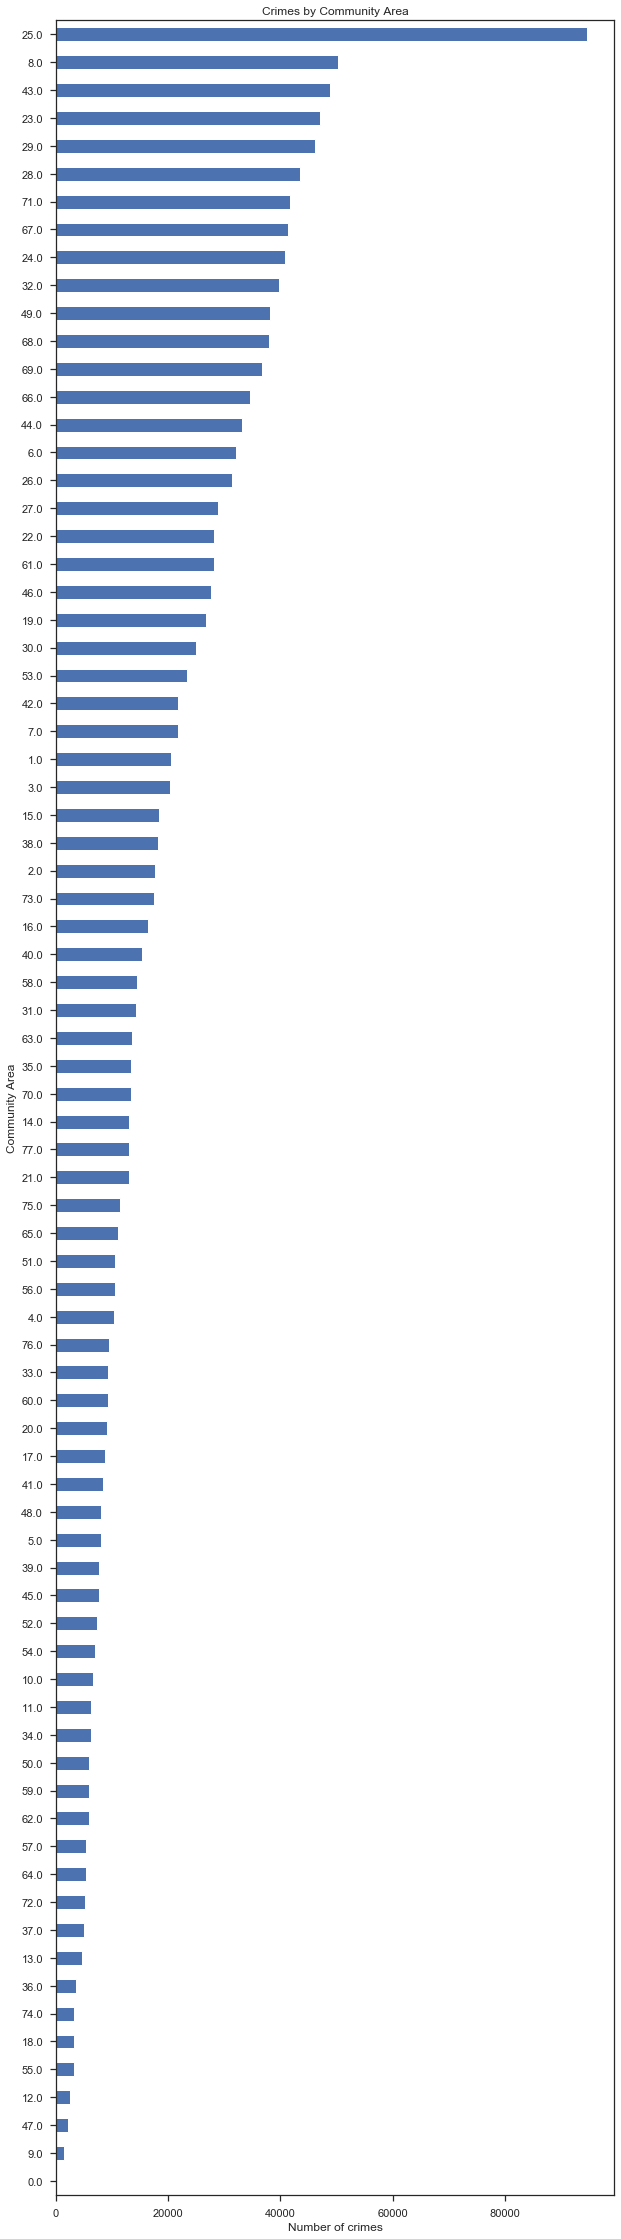

In [25]:
#Lets see the Community Area
plt.figure(figsize=(10,40))
df.groupby([df['Community Area']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Crimes by Community Area')
plt.ylabel('Community Area')
plt.xlabel('Number of crimes')
plt.show()

#Community Area 25 is most dangerours and Community Areas 0 and 9 are most safe